# Training and Inferencing Model Using Data Cleaning Methods

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge


pd.set_option('max_colwidth',200)
pd.set_option('display.width',200)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

#from xgboost import XGBRegressor

# 1. Data Cleaning

In [4]:
full = pd.read_excel('new_data.xls')
#full.drop([''],axis=1, inplace=True)
full = full.loc[:, ~full.columns.str.contains('^Unnamed')]
full = full.drop(columns=['""',"Jiulongpo","Tianhe","Kunshan","Zhabei"])
full = full.drop(columns=["distance","line","stop","小区"])
full.head()

,Price,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,Jiading,Fengxian,Baoshan,Chongming,Xuhui,Putuo,Yangpu,Songjiang,Pudong,Hongkou,Jinshan,Changning,Minhang,Qingpu,Jingan,Huangpu
0,6700,65.00,2.0,0,NaN,NaN,1,NaN,NaN,121.489484,31.240372999999998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8500,91.00,2.0,2,NaN,NaN,1,NaN,NaN,121.46085500000001,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,56.07,2.0,1,NaN,NaN,1,NaN,NaN,121.44033799999998,31.419139,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5500,84.00,2.0,2,NaN,NaN,1,NaN,NaN,121.46085500000001,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6800,78.00,1.0,2,NaN,NaN,1,NaN,NaN,121.543922,31.278916,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [5]:
for col in full:
    full[col] = pd.to_numeric(full[col], errors='coerce')
full.head(40)

,Price,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,Jiading,Fengxian,Baoshan,Chongming,Xuhui,Putuo,Yangpu,Songjiang,Pudong,Hongkou,Jinshan,Changning,Minhang,Qingpu,Jingan,Huangpu
0,6700,65.00,2.0,0,NaN,NaN,1,NaN,NaN,121.489484,31.240373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8500,91.00,2.0,2,NaN,NaN,1,NaN,NaN,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,56.07,2.0,1,NaN,NaN,1,NaN,NaN,121.440338,31.419139,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5500,84.00,2.0,2,NaN,NaN,1,NaN,NaN,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6800,78.00,1.0,2,NaN,NaN,1,NaN,NaN,121.543922,31.278916,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2600,78.50,2.0,2,NaN,NaN,0,NaN,NaN,121.441365,31.629754,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,4800,90.15,2.0,2,NaN,NaN,1,NaN,NaN,121.241312,31.066803,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,2700,76.00,2.0,1,NaN,NaN,0,NaN,NaN,121.148100,31.031397,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,3200,59.93,1.0,1,NaN,NaN,1,NaN,NaN,121.241312,31.066803,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,3000,89.00,2.0,2,NaN,NaN,1,NaN,NaN,121.420649,31.166613,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

Bathrooms        19031
OpenForVisits     7496
Exquisite         7496
Floor             3018
Latitude          1477
Longitude         1477
Bedrooms             1
dtype: int64

In [7]:
print(full['Longitude'].mean())
print(full['Latitude'].mean())

121.45541007503495
31.21349035829091


### Filling Empty Datas

In [8]:
cols=["Exquisite", "OpenForVisits"]
for col in cols:
    full[col].fillna(0, inplace=True)

### washrooms

In [9]:
temp = []
areas = full["Area"]
for a in areas:
    t = math.floor(a/120)+1
    temp.append(t)
full["temp"] = temp
full["Bathrooms"].fillna(full["temp"], inplace=True)
full = full.drop(columns=["temp"])
full.head(40)

,Price,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,Jiading,Fengxian,Baoshan,Chongming,Xuhui,Putuo,Yangpu,Songjiang,Pudong,Hongkou,Jinshan,Changning,Minhang,Qingpu,Jingan,Huangpu
0,6700,65.00,2.0,0,1.0,NaN,1,0.0,0.0,121.489484,31.240373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8500,91.00,2.0,2,1.0,NaN,1,0.0,0.0,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,56.07,2.0,1,1.0,NaN,1,0.0,0.0,121.440338,31.419139,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5500,84.00,2.0,2,1.0,NaN,1,0.0,0.0,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6800,78.00,1.0,2,1.0,NaN,1,0.0,0.0,121.543922,31.278916,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2600,78.50,2.0,2,1.0,NaN,0,0.0,0.0,121.441365,31.629754,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,4800,90.15,2.0,2,1.0,NaN,1,0.0,0.0,121.241312,31.066803,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,2700,76.00,2.0,1,1.0,NaN,0,0.0,0.0,121.148100,31.031397,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,3200,59.93,1.0,1,1.0,NaN,1,0.0,0.0,121.241312,31.066803,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,3000,89.00,2.0,2,1.0,NaN,1,0.0,0.0,121.420649,31.166613,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### floor

In [10]:
cols=["Bedrooms","Floor", "Longitude","Latitude"]
for col in cols:
    full[col].fillna(full[col].mean(), inplace=True)
full["Floor"]=full["Floor"].astype(np.int)
full["Bedrooms"]=full["Bedrooms"].astype(np.int)

## Scale & Calculate

In [11]:
from sklearn.model_selection import train_test_split

X = full.drop(columns = ["Price"])
y = full["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

X_train.shape[0]

17473

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
#scaler = RobustScaler()
scaler = StandardScaler()

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(y)
test_X_scaled = scaler.transform(X_test)

## Feature Selection

In [16]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
Area,0.341663
Bedrooms,0.230548
Floor,0.183886
Livingrooms,0.119950
Exquisite,0.112538
Latitude,0.048804
Huangpu,0.038650
Xuhui,0.038030
Changning,0.024654
NextToSubway,0.002580


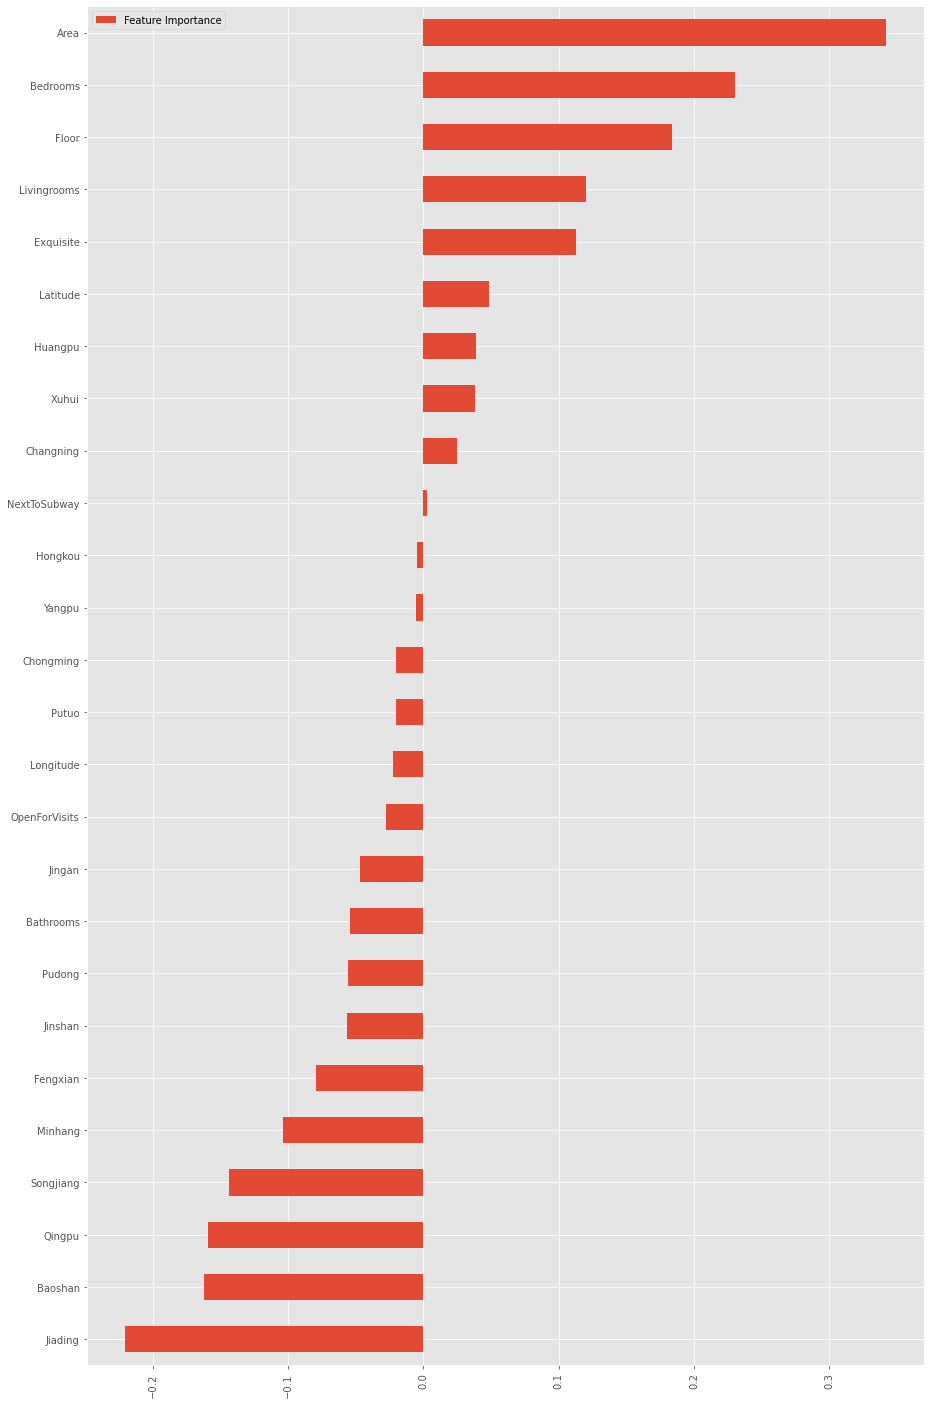

In [17]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()